In [ ]:
"""Install numpy pandas matplotlib, openpyxl and seaborn to use for the visualisations"""
# import sys

# !{sys.executable} -m pip install numpy openpyxl pandas matplotlib seaborn dataframe_image

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Atliq Adhoc Analysis Query Results.xlsx", sheet_name=None)
df_q1 = df['q1']
df_q2 = df['q2']
df_q3 = df['q3']
df_q4 = df['q4']
df_q5 = df['q5']
df_q6 = df['q6']
df_q7 = df['q7']
df_q8 = df['q8']
df_q9 = df['q9']
df_q10 = df['q10']

In [121]:
import dataframe_image as dfi

In [125]:
# Save output of df1 as an image 
# List of markets where Atliq Exclusive operates its business in the APAC region

dfi.export(df_q1.style.background_gradient(), "./visualisations/q1.png", table_conversion="matplotlib")

In [133]:
# Save output of df1 as an image 

dfi.export(df_q2.style.background_gradient(), "./visualisations/q2-1.png", table_conversion="matplotlib")

In [141]:
def save_df_image(df_input: pd.DataFrame, filename: str) -> None:
    """A function that saves an inputted dataframe as an image in the visualisations directory"""
    
    dfi.export(df_input.style.background_gradient(), f"./visualisations/{filename}", table_conversion="matplotlib")

In [36]:
# Create copy of query 2 result for visualisation only
df_q2_vis = df_q2[['prd_count_2020', 'prd_count_2021']]
df_q2_vis = df_q2_vis.rename(columns={"prd_count_2020": '2020', "prd_count_2021": '2021'})
df_q2_vis

,2020,2021
0,245,334


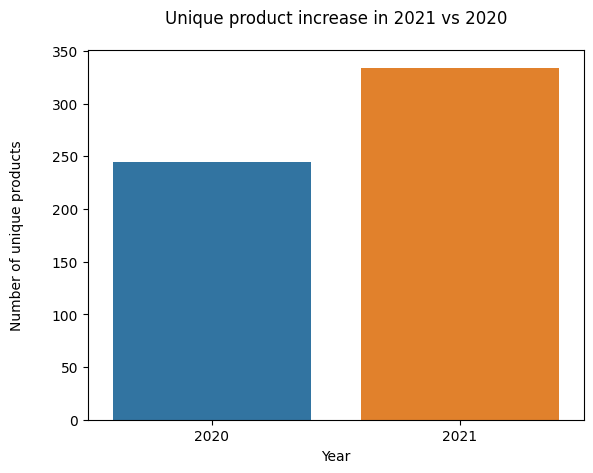

In [67]:
fig, ax = plt.subplots()
sns.barplot(data=df_q2_vis)
ax.set_ylabel("Number of unique products", labelpad=20)
ax.set_xlabel("Year")
ax.set_title("Unique product increase in 2021 vs 2020", y=1.05)
plt.savefig("./visualisations/q2.png", bbox_inches="tight")
plt.show()

In [142]:
save_df_image(df_q3, "q3-1.png")
df_q3

,segment,product_count
0,Notebook,129
1,Accessories,116
2,Peripherals,84
3,Desktop,32
4,Storage,27
5,Networking,9


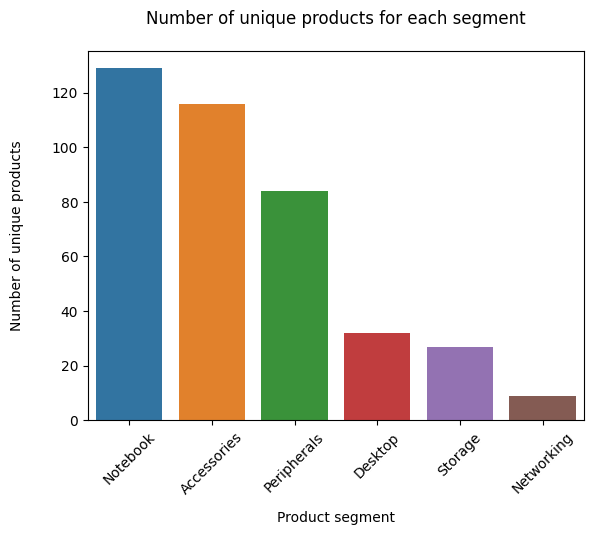

In [110]:
fig, ax = plt.subplots()
sns.barplot(df_q3, x='segment', y='product_count', hue='segment')
ax.set_xlabel("Product segment", labelpad=10)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel("Number of unique products", labelpad=20)
ax.set_title("Number of unique products for each segment", y=1.05)
plt.savefig("./visualisations/q3.png", bbox_inches="tight")
plt.show()

In [143]:
save_df_image(df_q4, "q4-1.png")
df_q4

,segment,product_count_2020,product_count_2021,difference
0,Accessories,69,103,34
1,Desktop,7,22,15
2,Networking,6,9,3
3,Notebook,92,108,16
4,Peripherals,59,75,16
5,Storage,12,17,5


In [101]:
df_q4_wide = pd.melt(df_q4, 
                       id_vars=['segment'],
                       value_vars=['product_count_2020', 'product_count_2021', 'difference'],
                       var_name='Years and Difference',
                       value_name='Product Count')
df_q4_wide

,segment,Years and Difference,Product Count
0,Accessories,product_count_2020,69
1,Desktop,product_count_2020,7
2,Networking,product_count_2020,6
3,Notebook,product_count_2020,92
4,Peripherals,product_count_2020,59
5,Storage,product_count_2020,12
6,Accessories,product_count_2021,103
7,Desktop,product_count_2021,22
8,Networking,product_count_2021,9
9,Notebook,product_count_2021,108


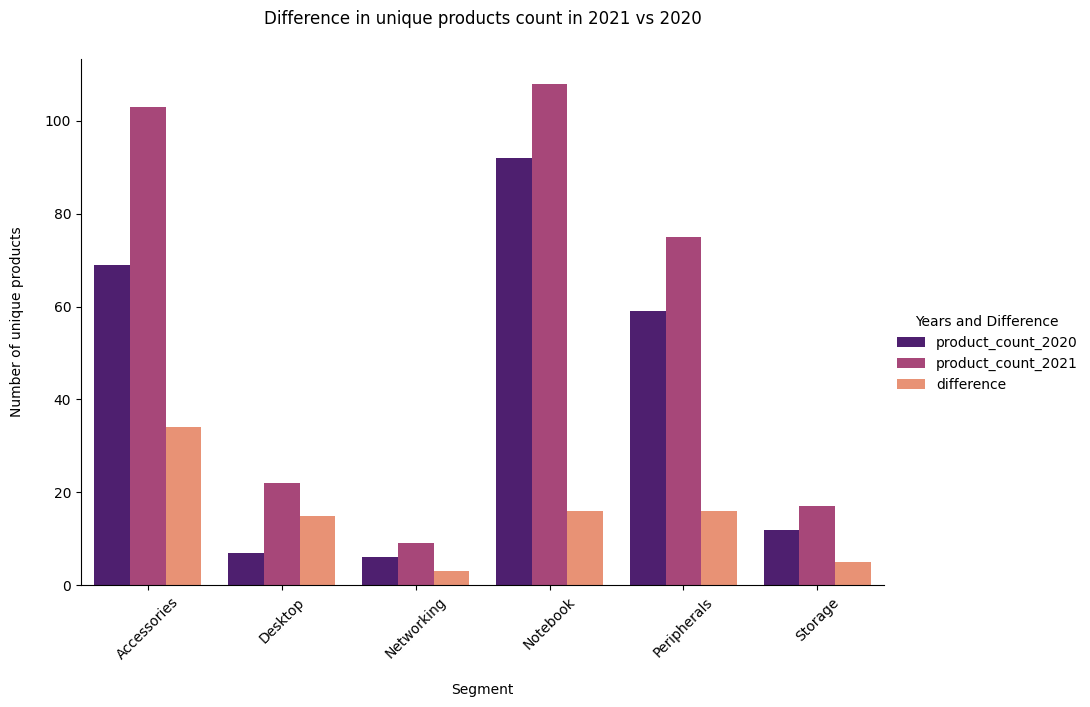

In [164]:
g = sns.catplot(
    data = df_q4_wide,
    x='segment',
    y='Product Count',
    hue='Years and Difference',
    height=6,
    kind='bar',
    aspect=1.5,
    palette='magma',
    errorbar=None
)
for ax in g.axes.flat:
    ax.set_xlabel("Segment", labelpad=15)
    ax.set_ylabel("Number of unique products", labelpad=15)
    ax.set_title("Difference in unique products count in 2021 vs 2020", y=1.05)
    
plt.xticks(rotation=45)
g.savefig("./visualisations/q4.png")
plt.show()

In [152]:
save_df_image(df_q5, "q5-1.png")
df_q5

,product_code,product,manufacturing_cost
0,A2118150101,AQ Master wired x1 Ms,0.8920
1,A6120110206,AQ HOME Allin1 Gen 2,240.5364


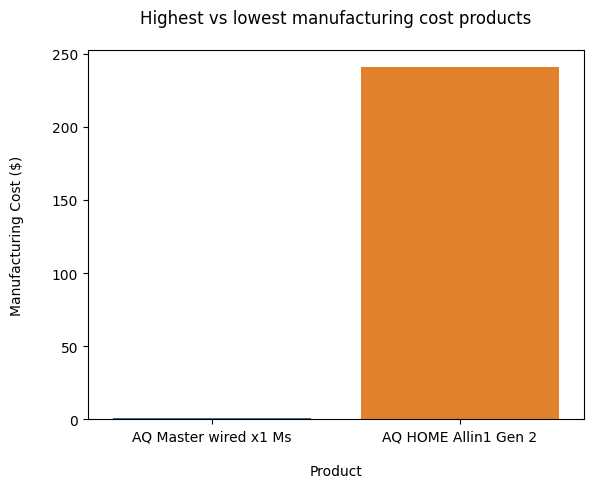

In [156]:
fig, ax = plt.subplots()
sns.barplot(df_q5, x='product', y='manufacturing_cost', hue='product')
ax.set_xlabel("Product", labelpad=15)
ax.set_ylabel("Manufacturing Cost ($)", labelpad=20)
ax.set_title("Highest vs lowest manufacturing cost products", y=1.05)
plt.savefig("./visualisations/q5.png", bbox_inches='tight')
plt.show()

In [173]:
# Manually save q6 dframe to avoid it shading customer code-
dfi.export(df_q6.style.background_gradient(subset=['average_discount_percentage']), "./visualisations/q6-1.png", table_conversion="matplotlib")

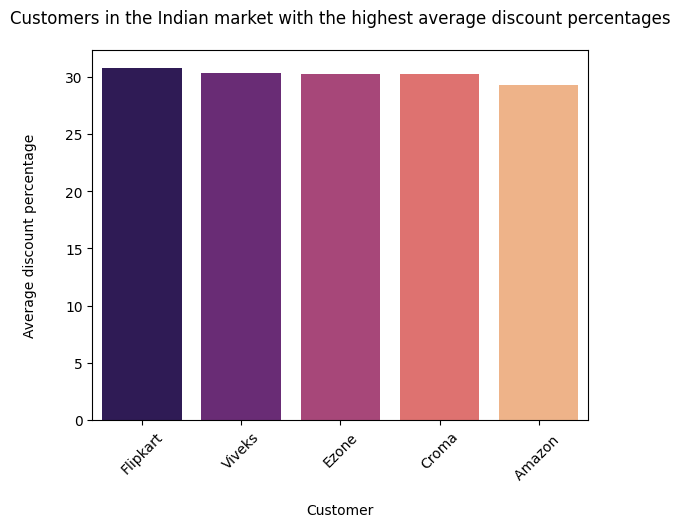

In [166]:
fig, ax = plt.subplots()
sns.barplot(df_q6, x="customer", y="average_discount_percentage", hue='customer', palette='magma')
ax.set_xlabel("Customer", labelpad=15)
ax.set_ylabel("Average discount percentage", labelpad=20)
ax.set_title("Customers in the Indian market with the highest average discount percentages", y=1.05)
plt.xticks(rotation=45)
fig.savefig("./visualisations/q6.png", bbox_inches='tight')
plt.show()

In [210]:
df_q7 = pd.read_excel("Atliq Adhoc Analysis Query Results.xlsx", sheet_name='q7')
df_q7

,Month,Year,gross_sales_amount
0,November,2019,1.523189e+07
1,October,2019,1.037864e+07
2,December,2019,9.755795e+06
3,September,2019,9.092670e+06
4,November,2020,3.224729e+07
5,October,2020,2.101622e+07
6,December,2020,2.040906e+07
7,September,2020,1.953027e+07
8,January,2020,9.584952e+06
9,February,2020,8.083996e+06


In [211]:
# Convert the gross sales amount to be in millions
df_q7_vis = df_q7
df_q7_vis['gross_sales_amount'] = df_q7_vis['gross_sales_amount'] / 1000000
dfi.export(df_q7_vis.style.background_gradient(subset=['gross_sales_amount', ['Year']), "./visualisations/q7-1.png", table_conversion="matplotlib")
df_q7_vis

,Month,Year,gross_sales_amount
0,November,2019,15.231895
1,October,2019,10.378638
2,December,2019,9.755795
3,September,2019,9.092670
4,November,2020,32.247290
5,October,2020,21.016218
6,December,2020,20.409063
7,September,2020,19.530271
8,January,2020,9.584952
9,February,2020,8.083996


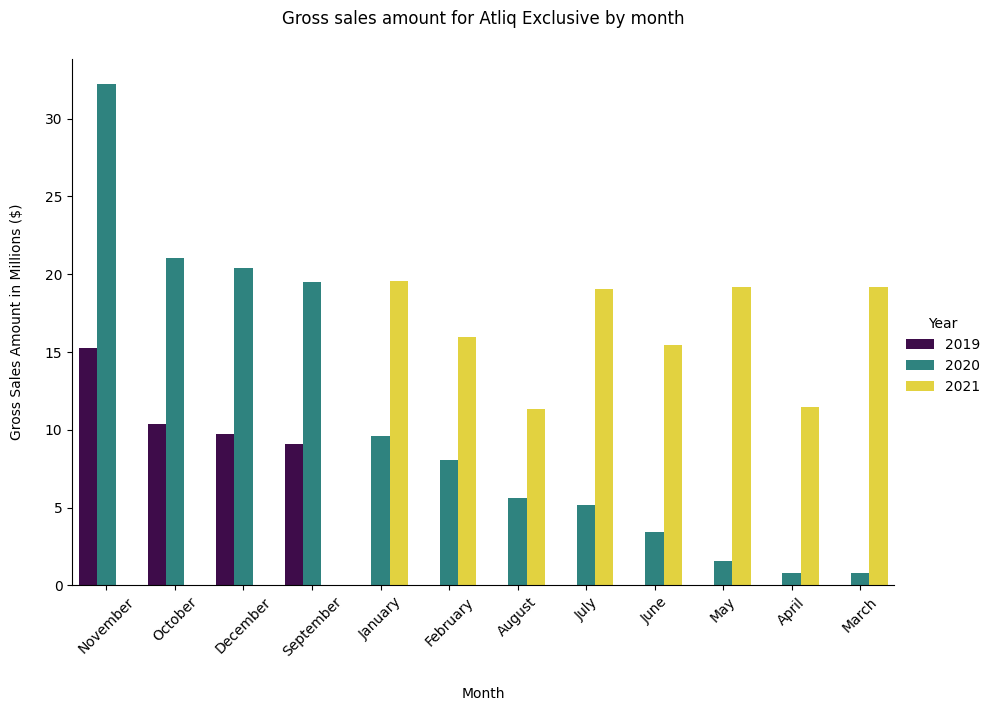

In [216]:
g = sns.catplot(
    data = df_q7_vis,
    x='Month',
    y='gross_sales_amount',
    hue='Year',
    height=6,
    kind='bar',
    aspect=1.5,
    palette='viridis',
    errorbar=None
)
for ax in g.axes.flat:
    ax.set_xlabel("Month", labelpad=20)
    ax.set_ylabel("Gross Sales Amount in Millions ($)", labelpad=15)
    ax.set_title("Gross sales amount for Atliq Exclusive by month", y=1.05)
    
plt.xticks(rotation=45)
plt.savefig("./visualisations/q7.png", bbox_inches='tight')
plt.show()

In [231]:
df_q8_vis = df_q8
df_q8_vis['total_sold_quantity'] = df_q8_vis['total_sold_quantity'] / 1000000
df_q8_vis = df_q8_vis.rename(columns={"total_sold_quantity": "total_sold_quantity (millions)"})
df_q8_vis

,quarter,total_sold_quantity (millions)
0,2,3.395899
1,1,3.704398
2,3,5.246770
3,4,8.425822


In [232]:
save_df_image(df_q8_vis, "q8-1.png")
df_q8_vis

,quarter,total_sold_quantity (millions)
0,2,3.395899
1,1,3.704398
2,3,5.246770
3,4,8.425822


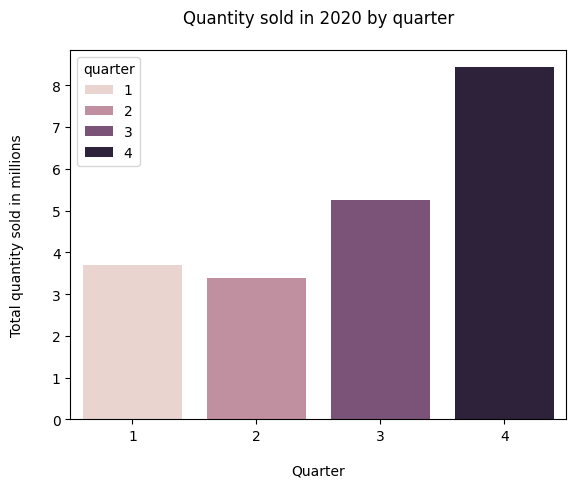

In [237]:
fig, ax = plt.subplots()
ax.set_xlabel("Quarter", labelpad=15)
ax.set_ylabel("Total quantity sold in millions", labelpad=20)
ax.set_title("Quantity sold in 2020 by quarter", y=1.05)
sns.barplot(df_q8_vis, x='quarter', y='total_sold_quantity (millions)', hue='quarter')
plt.savefig("./visualisations/q8.png", bbox_inches='tight')
plt.show()

In [239]:
save_df_image(df_q9, "q9-1.png")
df_q9

,channel,gross_sales_mln,percentage
0,Direct,257.53,15.47
1,Distributor,188.03,11.30
2,Retailer,1219.08,73.23


In [244]:
# Get 2 dataframes, one for the bar plot and one for the pie chart

df_q9_bar = df_q9[['channel', 'gross_sales_mln']]
df_q9_pie = df_q9[['channel', 'percentage']]

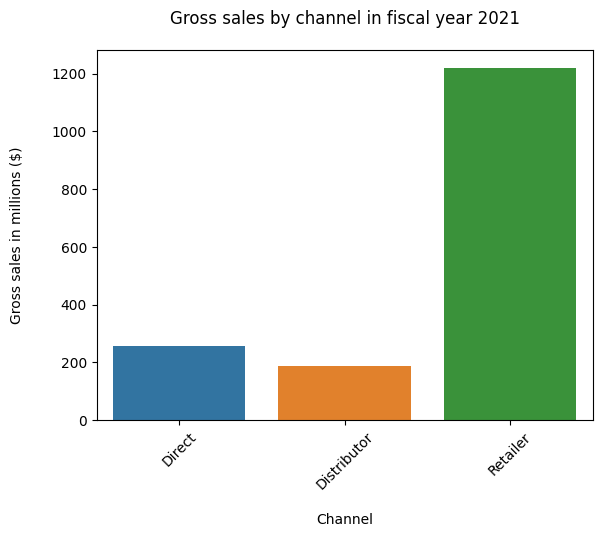

In [247]:
fig, ax = plt.subplots()
sns.barplot(df_q9_bar, x='channel', y='gross_sales_mln', hue='channel')
ax.set_xlabel("Channel", labelpad=15)
ax.set_ylabel("Gross sales in millions ($)", labelpad=20)
ax.set_title("Gross sales by channel in fiscal year 2021", y=1.05)
plt.xticks(rotation=45)
plt.savefig("./visualisations/q9-bar.png", bbox_inches='tight')
plt.show()

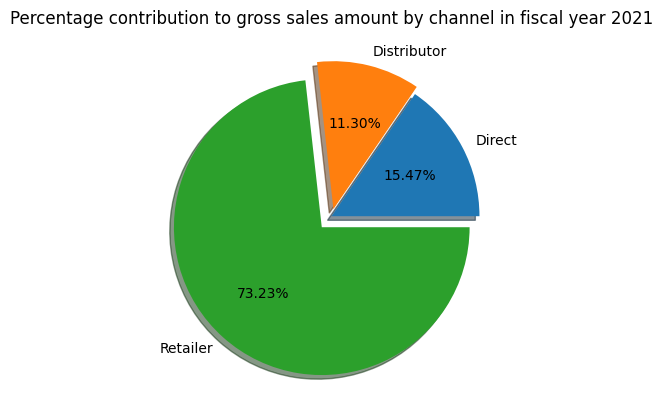

In [258]:
explode = [0, 0.05, 0.1]  # explode the pie slices 

fig, ax = plt.subplots()
ax.pie(df_q9_pie['percentage'], labels=df_q9_pie['channel'], autopct="%1.2f%%", explode=explode, shadow=True)
ax.set_title("Percentage contribution to gross sales amount by channel in fiscal year 2021")
plt.savefig("./visualisations/q9-pie.png", bbox_inches='tight')
plt.show()

In [273]:
df_q10

,division,product_code,product,total_sold_quantity,rank_order
0,N & S,A6720160103,AQ Pen Drive 2 IN 1,701373,1
1,N & S,A6818160202,AQ Pen Drive DRC,688003,2
2,N & S,A6819160203,AQ Pen Drive DRC,676245,3
3,P & A,A2319150302,AQ Gamers Ms,428498,1
4,P & A,A2520150501,AQ Maxima Ms,419865,2
5,P & A,A2520150504,AQ Maxima Ms,419471,3
6,PC,A4218110202,AQ Digit,17434,1
7,PC,A4319110306,AQ Velocity,17280,2
8,PC,A4218110208,AQ Digit,17275,3


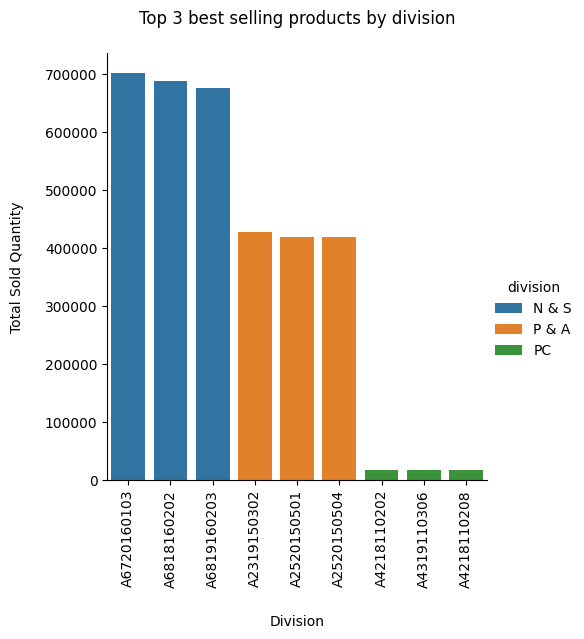

In [278]:
g = sns.catplot(
    data = df_q10,
    x='product_code',
    y='total_sold_quantity',
    hue='division',
    kind='bar'
)

for ax in g.axes.flat:
    ax.set_xlabel("Division", labelpad=20)
    ax.set_ylabel("Total Sold Quantity", labelpad=15)
    ax.set_title("Top 3 best selling products by division", y=1.05)

plt.xticks(rotation=90)
plt.savefig("./visualisations/q10.png", bbox_inches='tight')
plt.show()